In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import cv2
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim 

plt.style.use("figures.mplstyle")

In [2]:
filePath = os.getcwd()
dataPath = os.path.join(filePath, "data")

In [3]:
general100X2Path = os.path.join(dataPath, "General100", "X2")

imgGT = cv2.imread(os.path.join(general100X2Path, "GT", "im_1.bmp"))
imgLR = cv2.imread(os.path.join(general100X2Path, "LR", "im_1.bmp"))

# Convert to YCrCb
imgGT = cv2.cvtColor(imgGT, cv2.COLOR_BGR2YCrCb)
imgLR = cv2.cvtColor(imgLR, cv2.COLOR_BGR2YCrCb)

yLR = imgLR[:,:,0]
crcbLR = imgLR[:,:,1:]
yGT = imgGT[:,:,0]
crcbGT = imgGT[:,:,1:]

# Resize Y channel
yBilinear = cv2.resize(yLR, (yGT.shape[1], yGT.shape[0]), interpolation=cv2.INTER_LINEAR)
yBicubic = cv2.resize(yLR, (yGT.shape[1], yGT.shape[0]), interpolation=cv2.INTER_CUBIC)
yNearest = cv2.resize(yLR, (yGT.shape[1], yGT.shape[0]), interpolation=cv2.INTER_NEAREST)

# Resize Cr and Cb channels using bicubic interpolation
crcbBicubic = cv2.resize(crcbLR, (crcbGT.shape[1], crcbGT.shape[0]), interpolation=cv2.INTER_CUBIC)

# Merge Y channel with bicubic interpolated Cr and Cb channels
imgBilinear = cv2.merge([yBilinear, crcbBicubic])
imgBicubic = cv2.merge([yBicubic, crcbBicubic])
imgNearest = cv2.merge([yNearest, crcbBicubic])

# Calculate PSNR (Peak Signal-to-Noise Ratio) on Y channel
bilinearPSNR = psnr(yGT, yBilinear)
bicubicPSNR = psnr(yGT, yBicubic)
nearestPSNR = psnr(yGT, yNearest)

# Calculate SSIM (Structural Similarity Index) on Y channel
bilinearSSIM = ssim(yGT, yBilinear)
bicubicSSIM = ssim(yGT, yBicubic)
nearestSSIM = ssim(yGT, yNearest)

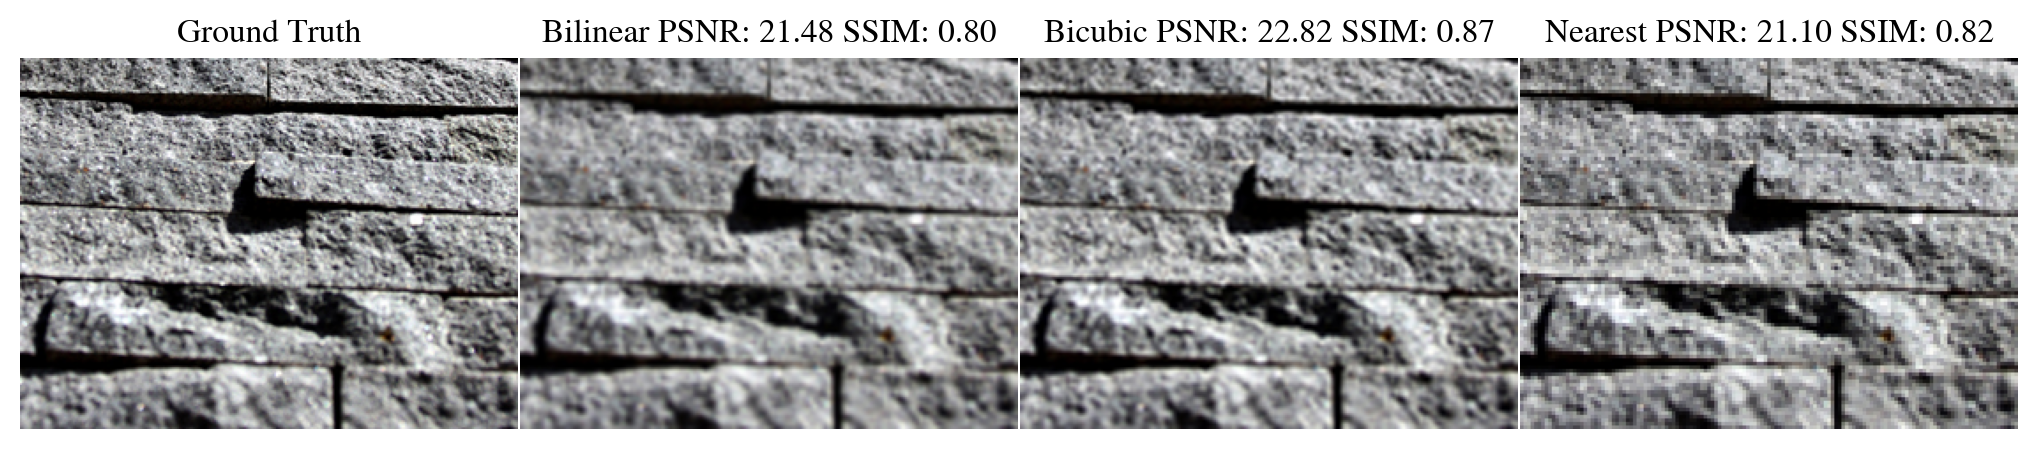

In [4]:
def showImages(images: list[tuple[np.ndarray, str]]) -> None:
    """
    Display images in a row with titles.
    :param images (list[tuple[np.ndarray, str]]): List of
        tuples containing image and title. Images passed
        must be in YCrCb color space.
    """
    fig, axs = plt.subplots(1, len(images), figsize=(10, 10))
    for i, (img, title) in enumerate(images):
        img = cv2.cvtColor(img, cv2.COLOR_YCrCb2RGB)
        axs[i].imshow(img)
        axs[i].set_title(title)
        axs[i].axis("off")
    plt.show()
   
showImages([
    (imgGT, "Ground Truth"),
    (imgBilinear, f"Bilinear PSNR: {bilinearPSNR:.2f} SSIM: {bilinearSSIM:.2f}"),
    (imgBicubic, f"Bicubic PSNR: {bicubicPSNR:.2f} SSIM: {bicubicSSIM:.2f}"),
    (imgNearest, f"Nearest PSNR: {nearestPSNR:.2f} SSIM: {nearestSSIM:.2f}")
])